In [4]:
# QUESTION - 01

# Please refer to the “Purchase Data” worksheet of Lab Session1 Data.xlsx. Please load the data and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following activities.
#• What is the dimensionality of the vector space for this data?
#• How many vectors exist in this vector space?
#• What is the rank of Matrix A?
#• Using Pseudo-Inverse find the cost of each product available for sale.
#(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a pseudo-inverse.)


# Importing the required libraries
import pandas as pd

# Provide the full path to the Excel file

dataset = pd.read_excel(r"/Users/krishnavarma/Developer/UG AI MATERIAL /4th SEM COURSE'S/ML/ML CLG PR.CODES!/A3 ML/Lab Session1 Data.xlsx", sheet_name="Purchase data")

# Extracting input features (X) and output labels (Y)
X = dataset[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
Y = dataset['Payment (Rs)'].to_numpy().reshape(-1, 1)

# Printing the input features (X) and output labels (Y)
print(f"Input features (X):\n{X}")
print(f"Output labels (Y):\n{Y}")

# Finding the dimensionality of the vector space
dimensionality = X.shape[1]
print("The dimensionality of the vector space is: " + str(dimensionality))

# Finding the total number of vectors in the vector space
num_vectors = X.shape[0]
print("The number of vectors in the vector space is: " + str(num_vectors))

# Calculating the rank of the matrix X
rank_X = np.linalg.matrix_rank(X)
print("The rank of the matrix X is: " + str(rank_X))

# Calculating the pseudo-inverse of matrix X
pseudo_inverse_X = np.linalg.pinv(X)
print("The pseudo-inverse of matrix X is:\n" + str(pseudo_inverse_X))

# Calculating the cost of each product available for sale
cost_per_product = np.dot(pseudo_inverse_X, Y)
print("The cost of each product that is available for sale is:\n" + str(cost_per_product.flatten()))




Input features (X):
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Output labels (Y):
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
The dimensionality of the vector space is: 3
The number of vectors in the vector space is: 10
The rank of the matrix X is: 3
The pseudo-inverse of matrix X is:
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
The cost of each product that is available for sale is:
[ 1. 55. 18.]


In [8]:
# QUESTION - 02
# Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.

import pandas as pd
import numpy as np

# Read the Excel file containing purchase data into a DataFrame
purchase_data = pd.read_excel("/Users/krishnavarma/Developer/UG AI MATERIAL /4th SEM COURSE'S/ML/ML CLG PR.CODES!/A3 ML/Lab Session1 Data.xlsx", sheet_name="Purchase data")

# Extracting input features (X) and output target (Y) from the DataFrame
X_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
X = np.array([purchase_data[col].values for col in X_columns]).T
Y = purchase_data['Payment (Rs)'].values.reshape(-1, 1)

# Calculating the pseudo-inverse of the input features matrix (X)
pseudo_inverse_X = np.linalg.pinv(X)

# Finding the model vector (coefficients for predicting the cost) using pseudo-inverse
model_vector_coefficients = np.dot(pseudo_inverse_X, Y)

# Displaying the model vector for predicting the cost of products available with the vendor
print(f"The model vector coefficients for predicting the cost of the products available with the vendor = {model_vector_coefficients.flatten()}")





The model vector coefficients for predicting the cost of the products available with the vendor = [ 1. 55. 18.]


In [18]:
 
#QUESTION - 03

 #Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize 
 # customers into RICH or POOR class based onpurchase behavior.

import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the data from the Excel file into a DataFrame
data = pd.read_excel(r"Lab Session1 Data.xlsx", sheet_name="Purchase data")

# Create a new column 'Category' based on the 'Payment (Rs)' column to classify customers as 'RICH' or 'POOR'
data['Category'] = data['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

# Extract features (X) and target variable (Y)
features = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
target = data['Category'] 

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.5, random_state=42)

# Initialize the K-Nearest Neighbors classifier with k=5
classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the test data
predictions = classifier.predict(X_test)

# Print the classification report to evaluate the performance of the classifier
print("Classification Report")
print(classification_report(Y_test, predictions))


Classification Report
              precision    recall  f1-score   support

        POOR       0.00      0.00      0.00         2
        RICH       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Closing Prices: 0      2081.85
1      2077.75
2      2068.85
3      2072.95
4      2078.25
        ...   
244    1397.40
245    1400.75
246    1405.10
247    1412.35
248    1363.05
Name: Price, Length: 249, dtype: float64
Mean Closing Price: 1560.663453815261
Variance of Closing Prices: 58732.365352539186
Mean Price for Wednesdays: 1550.7060000000001
Mean Price for April: 1698.9526315789474
Probability of Making Loss: 0.4979919678714859
Probability of Making Profit on Wednesdays: 0.08433734939759036
Conditional Probability of Making Profit, Given it's Wednesday: 0.42


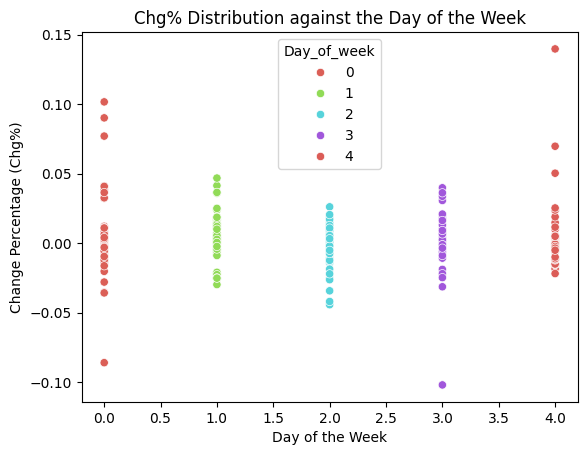

In [13]:
#QUESTION - 04

 #Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.
#• Calculate the mean and variance of the Price data present in column D.(Suggestion: if you use Python, you may use statistics.mean() & statistics.variance() methods).
#• Select the price data for all Wednesdays and calculate the sample mean. Compare the meanwith the population mean and note your observations.
#• Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.


import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
stock_data = pd.read_excel(r"Lab Session1 Data.xlsx", sheet_name="IRCTC Stock Price")

# Extracting the 'Close' column (column D)
closing_prices = stock_data.iloc[:, 3]

# Display the closing prices
print(f"Closing Prices: {closing_prices}")

# Calculate the mean of closing prices
mean_price = statistics.mean(closing_prices)
print(f"Mean Closing Price: {mean_price}")

# Calculate the variance of closing prices
variance_price = statistics.variance(closing_prices)
print(f"Variance of Closing Prices: {variance_price}")

# Convert 'Date' column to datetime format
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

# Extract Wednesdays' data
wednesdays_data = stock_data[stock_data["Date"].dt.weekday == 2]
wednesdays_prices = wednesdays_data['Price']
wednesdays_mean_price = wednesdays_prices.mean()
print(f"Mean Price for Wednesdays: {wednesdays_mean_price}")

# Extract April data
april_data = stock_data[stock_data["Date"].dt.month == 4]
april_mean_price = statistics.mean(april_data['Price'])
print(f"Mean Price for April: {april_mean_price}")

# Calculate the probability of making a loss
loss_count = (stock_data['Chg%'] < 0).sum()
total_samples = len(stock_data)
loss_probability = loss_count / total_samples
print(f"Probability of Making Loss: {loss_probability}")

# Calculate the probability of making a profit on Wednesdays
profit_count_on_wednesdays = (stock_data.loc[stock_data['Date'].dt.weekday == 2, 'Chg%'] > 0).sum()
wednesday_profit_probability = profit_count_on_wednesdays / total_samples
print(f"Probability of Making Profit on Wednesdays: {wednesday_profit_probability}")

# Calculate the conditional probability of making a profit given that it's Wednesday
profitable_wednesdays = wednesdays_data[wednesdays_data['Chg%'] > 0]
num_profitable_wednesdays = len(profitable_wednesdays)
total_wednesdays = len(wednesdays_data)
conditional_profit_probability_wednesday = num_profitable_wednesdays / total_wednesdays
print(f"Conditional Probability of Making Profit, Given it's Wednesday: {conditional_profit_probability_wednesday}")

# Plotting Chg% Distribution against the day of the week
stock_data["Day_of_week"] = stock_data['Date'].dt.weekday
sns.scatterplot(x="Day_of_week", y="Chg%", data=stock_data, hue="Day_of_week", palette="hls")
plt.xlabel("Day of the Week")
plt.ylabel("Change Percentage (Chg%)")
plt.title("Chg% Distribution against the Day of the Week")
plt.show()
